<a href="https://colab.research.google.com/github/SangeethaManammal/DeepLearningSamples/blob/main/Introduction_to_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

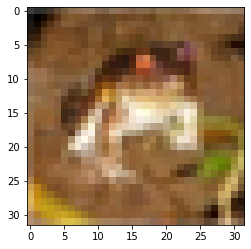

In [4]:
plt.imshow(x_train[0])

In [5]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train = y_train.reshape(-1,)
y_train.shape

(50000,)

In [8]:
cifar_classes[y_train[0]]

'frog'

In [9]:
def show_image(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(cifar_classes[y[index]])

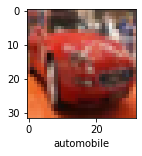

In [10]:
show_image(x_train,y_train,5)

In [11]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000,activation = 'relu'),
    keras.layers.Dense(1000,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(optimizer = 'SGD',
             loss = 'sparse_categorical_crossentropy' ,
             metrics = ['accuracy'] )

model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 7ms/step - loss: 1.8091 - accuracy: 0.3552
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6231 - accuracy: 0.4317
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5434 - accuracy: 0.4567
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4803 - accuracy: 0.4792
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4316 - accuracy: 0.4959
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3894 - accuracy: 0.5097
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3510 - accuracy: 0.5231
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3142 - accuracy: 0.5359
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2818 - accuracy: 0.5515
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.15      0.98      0.25      1000
           1       0.12      0.14      0.13      1000
           2       0.22      0.17      0.19      1000
           3       0.21      0.26      0.23      1000
           4       0.34      0.02      0.03      1000
           5       0.02      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.58      0.01      0.01      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.16     10000
   macro avg       0.16      0.16      0.09     10000
weighted avg       0.16      0.16      0.09     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 8ms/step - loss: 1.8685 - accuracy: 0.4016
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2797 - accuracy: 0.5512
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1266 - accuracy: 0.6112
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0197 - accuracy: 0.6466
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9393 - accuracy: 0.6741
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8694 - accuracy: 0.6976
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8029 - accuracy: 0.7207
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7558 - accuracy: 0.7376
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7104 - accuracy: 0.7511
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

In [20]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.1735 - accuracy: 0.6434


[1.173470139503479, 0.6434000134468079]

In [21]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[6.3869951e-04, 4.7120154e-03, 3.9235785e-04, 9.5864117e-01,
        1.2965262e-05, 2.4350917e-02, 8.4249470e-03, 1.5511742e-04,
        1.2731648e-03, 1.3985755e-03],
       [3.5563525e-02, 1.0624650e-03, 5.0560584e-07, 5.4075022e-10,
        1.2768487e-11, 7.8379586e-10, 4.7860757e-11, 1.4749264e-14,
        9.6320200e-01, 1.7156362e-04],
       [4.1871242e-02, 2.6934606e-01, 1.2610544e-03, 2.7799016e-04,
        6.5870991e-05, 6.0416508e-04, 4.8303758e-04, 1.8932467e-04,
        6.5141678e-02, 6.2075961e-01],
       [5.8966119e-02, 9.4548445e-03, 1.3019575e-03, 2.6481616e-04,
        1.1798223e-05, 7.9233996e-06, 9.8344368e-05, 2.0964117e-07,
        9.2971629e-01, 1.7768590e-04],
       [4.2037809e-05, 3.5512083e-05, 5.2819480e-03, 2.4146928e-02,
        6.7689575e-02, 3.8653766e-03, 8.9871591e-01, 4.5961046e-05,
        1.4599676e-04, 3.0809886e-05]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 8, 6]

In [23]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)